## ASSIGNMENT4

## NALLAKALVA RISHITHA REDDY

## 700742428

1. Apply Linear Regression to the provided dataset using underlying steps.
a. Import the given “Salary_Data.csv”
b. Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.
c. Train and predict the model.
d. Calculate the mean_squared error
e. Visualize both train and test data using scatter plot.

In [20]:
#importing all modules needed for linear regression 
import pandas as pd
import numpy as np
import seaborn as seabrn
seabrn.set(style="white", color_codes=True)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import metrics
#warnings are used for error indications or intimation of error
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_square_Error
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


In [5]:
#showing salary data in a dataframe which has experience and salary 
data_frame=pd.read_csv("Salary_Data.csv")
data_frame.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [16]:
#data frame values for regression to predict testing values
A = data_frame.iloc[:, :-1].values
B = data_frame.iloc[:, 1].values
A_Training, A_Testing, B_Training, B_Testing = train_test_split(A,B, test_size=1/3,random_state = 0)
reg = LinearRegression()
reg.fit(A_Training, B_Training)
B_Prediction = reg.predict(A_Testing)


In [19]:
#error value of mean square which showing prdiction values
mean_square_Error(B_Testing,B_Prediction)

21026037.329511296

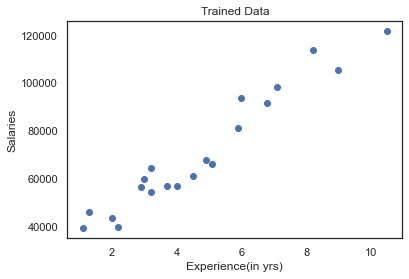

In [22]:
#showing trained data in dotted graph
plt.title('Trained Data')
plt.xlabel('Experience(in yrs)')
plt.ylabel('Salaries')
#plotting scatter values in the graph for x and y axis
plt.scatter(A_Training, B_Training)
#plotting the graph
plt.show()

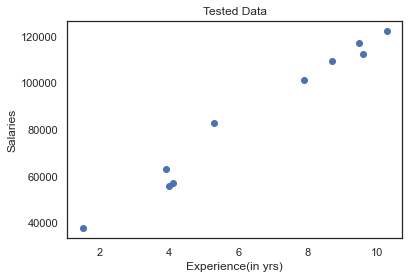

In [23]:
#showing tested data 
plt.title('Tested Data')
# showing x and y label for tested graph 
plt.xlabel('Experience(in yrs)')
plt.ylabel('Salaries')
#plotting scattered values using below testing values
plt.scatter(A_Testing, B_Testing)
#showing the plotted graph
plt.show()

2. Apply K means clustering in the dataset provided:
• Remove any null values by the mean.
• Use the elbow method to find a good number of clusters with the K-Means algorithm
• Calculate the silhouette score for the above clustering

In [80]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import metrics
# getting kmean dataset valuues in the form of datasets
data_frame=pd.read_csv("K-Mean_Dataset.csv")
data_frame.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [81]:
A = data_frame.iloc[:,1:].values
smpl_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
smpl_imputer = smpl_imputer.fit(A)
A = imputer.transform(A)

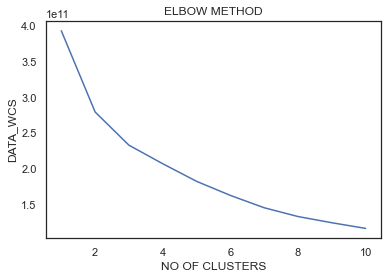

In [88]:

Data = []
#looping data for k mean values
for k in range(1,11):
    k_means = KMeans(n_clusters=k,init='k-means++',max_iter=300,n_init=10,random_state=0)
    k_means.fit(A)
    #appending dtaa to list Data
    Data.append(k_means.inertia_)
#plotting the range values after adding k mean data
plt.plot(range(1,11),Data)
plt.title('ELBOW METHOD')
plt.xlabel('NO OF CLUSTERS')
plt.ylabel('DATA_WCS')
plt.show()

In [67]:
#Try feature scaling and then apply K-Means on the scaled features. Did that improve the Silhouette score? If Yes, can you justify why
#showing it as k mean
K_clusters = 4 
k_mean = KMeans(n_clusters=K_clusters)
k_mean.fit(A)

KMeans(n_clusters=4)

In [83]:
cluster_km = km.predict(A)
#predicting the k mean to get score of silhouette
score = metrics.silhouette_score(A, cluster_km)
#printing silhouette_score
print(' score of Silhouette:',score)

 score of Silhouette: 0.13269785300098325


In [84]:
standard_scaler = preprocessing.StandardScaler()
standard_scaler.fit(A)
scaled_array = standard_scaler.transform(A)
#finding the scaled data for array
scaled_array = pd.DataFrame(scaled_array)

In [85]:

n_clusters_data = 4 
#adding scalled array to k mean
k_mean = KMeans(n_clusters=n_clusters_data)
k_mean.fit(scaled_array)

KMeans(n_clusters=4)

In [87]:
#applying scaling to score in k mean.
y_scaled_cluster_km = km.predict(scaled_array)
score = metrics.silhouette_score(scaled_array, y_scaled_cluster_km)
print('After applying scaling to the score')
print('score of Silhouette :',score)

After applying scaling to the score
score of Silhouette : 0.1976074492720698


In [ ]:
After applying scaling to k means the Silhouette score got decreased in minor range 